<h1>Klasifikácia kvality vína pomocou viacvrstvového perceptrónu</h1>
<br>
<h2>Import potrebných knižníc</h2>
<p>Na začiatok si imortujeme potrebné knižnice. V našom projekte budeme potrebovať pandas a numpy pre prácu s dátami, pre vizualizáciu dát použijeme matplotlib, ďalej budeme potrebovať MLPClassifier (Multi-layer Perceptron classifier) čiže klasifikátor, ktorý s určitou presnosťou klasifikuje dáta príslušných skupín. Na štandardizáciu dát použijeme StandardScaler, potom pomocou train_test_split budeme neskôr rozdelovať dáta na trénovacie a testovacie, a na koniec si ešte importujeme classification_report na výpis výsledkov klasifikácie.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

<h2>Príprava datasetu</h2>
<p>Pomocou read_csv si načítame príslušný dataset do padnas dataframeu.</p>

In [2]:
dataset = pd.read_csv("../NS2021_Dicer/wine-dataset.csv")

<p>Ako môžeme vidieť dataset obsahuje nasledujúce parametre:</p>
<p><b>type</b>: typ vína (biele , červené)</p>
<p><b>fixed acidity</b>: stála kyslosť</p>
<p><b>volatile acidity</b>: prchavá kyslosť</p>
<p><b>citric acid</b>: kyselina citrónová</p>
<p><b>residual sugar</b>: zvyškový cukor</p>
<p><b>chlorides</b>: chloridy</p>
<p><b>free sulfur dioxide</b>: voľný oxid siričitý</p>
<p><b>total sulfur dioxide</b>: celkový oxid siričitý</p>
<p><b>density</b>: hustota</p>
<p><b>pH</b>: pH (kyslosť)</p>
<p><b>sulphates</b>: sírany</p>
<p><b>alcohol</b>: alkohol</p>
<p><b>quality</b>: kvalita vína</p>


In [3]:
dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
dataset['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<p>Kvalita vín je ohodnotená na stupnici 0 až 10. Najlepšie vína sú v datasete ohodnotené deviatimi bodmi a najhoršie tromi.Kedže takéto rozdelenie nie je pre nás ideálne, rozdelíme si ich do troch kategórií:</p>
<p><b>nízka kvalita (0)</b> , <b>stredná kvalita (1)</b> , <b>vysoká kvalita (2)</b></p>

In [5]:
# kvalita vín je ohodnotená na stupnici 0 až 10
# najlepšie vína sú v datasete ohodnotené deviatimi bodmi a najhoršie tromi.
# Kedže tieto čísla nie su pre nás ideálne rozdelíme si ich do kategórií:
# nízka kvalita (0) , stredná kvalita (1) , vysoká kvalita (2)
bins= [0, 5.5, 7.5, 10] # vína s hodnotením 3-5 spadajú do kategórie nízka kvalita, 6-7 je stredná a 8-9 vysoká 
labels = [0, 1, 2]
dataset['quality'] = pd.cut(dataset['quality'], bins=bins, labels=labels)

<p>Aby sme mali dataset pripravený na klasifikáciu, musíme ešte doplniť chýbajúce hodnoty, takže tieto hodnoty vyplníme priemerom príslušného stĺpcu.<p>

In [6]:
dst = dataset.fillna(dataset.mean())
dst.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


<h2>Porozumenie dátam</h2>

<p>Keď použijeme funkciu <b>describe()</b> tak môžeme vidieť štatistické údaje datasetu, ako napríklad <b>count</b> (počet prvkov), <b>mean</b> (priemer), <b>std</b> (štandardná odchýlka), <b>min</b> (minimálna hodnota), <b>max</b> (maximálna hodnota). Vďaka tomu môžeme vidieť v akom rozmedzí sa dáta v príslušných stĺpcoch pohybujú.</p>

In [7]:
dst.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<p>Zaujímavé poznatky môžeme získať rozdelením parametrov podľa kvality vína. Preto si pomocou funkcie <b>groupby()</b> zoskupíme dáta podľa kvality vína a následne parametre pomocou <b>mean()</b> zpriemerujeme. Môžeme pozorovať určité odlišnosti parametrov vzhľadom na kvalitu vína. Napríklad môžeme vyčítať že čím viac alkoholu víno obsahuje, tým je väčšia pravdepodobnosť že bude mať vyššiu kvalitu.Naopak, čím viac chloridov obsahuje víno tým je väčšia prvdepodobnosť že bude dosahovať nižšiu kvalitu.</p>

In [8]:
means = dst.groupby('quality').mean()
means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,7.332040,0.397506,0.304182,5.646225,0.064412,29.480495,119.277055,0.995756,3.214398,0.524225,9.873544
1,7.164551,0.306938,0.326809,5.326102,0.051717,30.960281,113.505747,0.994164,3.220478,0.536478,10.807612
2,6.855134,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414


C:\Users\dicer\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'PRIEMER alcohol')

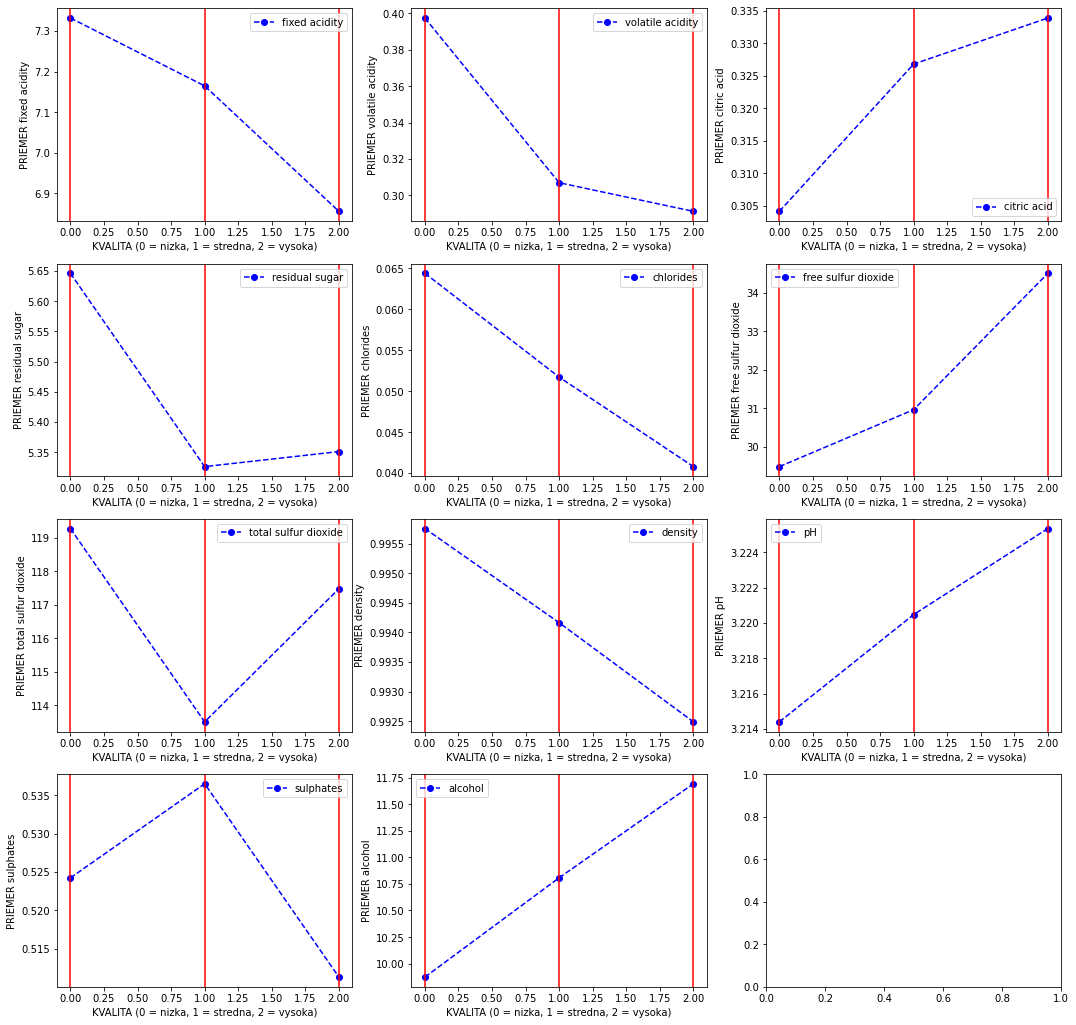

In [9]:
fig, axs = plt.subplots(4,3)
fig.set_figheight(18)
fig.set_figwidth(18)

axs[0,0].plot(means["fixed acidity"],'bo',linestyle='--',label="fixed acidity")
axs[0,0].legend(loc="upper right")
axs[0,0].axvline(x=0,color="r")
axs[0,0].axvline(x=1,color="r")
axs[0,0].axvline(x=2,color="r")
axs[0,0].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[0,0].set_ylabel('PRIEMER fixed acidity')

axs[0,1].plot(means["volatile acidity"],'bo',linestyle='--',label="volatile acidity")
axs[0,1].legend(loc="upper right")
axs[0,1].axvline(x=0,color="r")
axs[0,1].axvline(x=1,color="r")
axs[0,1].axvline(x=2,color="r")
axs[0,1].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[0,1].set_ylabel('PRIEMER volatile acidity')

axs[0,2].plot(means["citric acid"],'bo',linestyle='--',label="citric acid")
axs[0,2].legend(loc="lower right")
axs[0,2].axvline(x=0,color="r")
axs[0,2].axvline(x=1,color="r")
axs[0,2].axvline(x=2,color="r")
axs[0,2].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[0,2].set_ylabel('PRIEMER citric acid')

axs[1,0].plot(means["residual sugar"],'bo',linestyle='--',label="residual sugar")
axs[1,0].legend(loc="upper right")
axs[1,0].axvline(x=0,color="r")
axs[1,0].axvline(x=1,color="r")
axs[1,0].axvline(x=2,color="r")
axs[1,0].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[1,0].set_ylabel('PRIEMER residual sugar')

axs[1,1].plot(means["chlorides"],'bo',linestyle='--',label="chlorides")
axs[1,1].legend(loc="upper right")
axs[1,1].axvline(x=0,color="r")
axs[1,1].axvline(x=1,color="r")
axs[1,1].axvline(x=2,color="r")
axs[1,1].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[1,1].set_ylabel('PRIEMER chlorides')

axs[1,2].plot(means["free sulfur dioxide"],'bo',linestyle='--',label="free sulfur dioxide")
axs[1,2].legend(loc="upper left")
axs[1,2].axvline(x=0,color="r")
axs[1,2].axvline(x=1,color="r")
axs[1,2].axvline(x=2,color="r")
axs[1,2].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[1,2].set_ylabel('PRIEMER free sulfur dioxide')

axs[2,0].plot(means["total sulfur dioxide"],'bo',linestyle='--',label="total sulfur dioxide")
axs[2,0].legend(loc="upper right")
axs[2,0].axvline(x=0,color="r")
axs[2,0].axvline(x=1,color="r")
axs[2,0].axvline(x=2,color="r")
axs[2,0].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[2,0].set_ylabel('PRIEMER total sulfur dioxide')

axs[2,1].plot(means["density"],'bo',linestyle='--',label="density")
axs[2,1].legend(loc="upper right")
axs[2,1].axvline(x=0,color="r")
axs[2,1].axvline(x=1,color="r")
axs[2,1].axvline(x=2,color="r")
axs[2,1].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[2,1].set_ylabel('PRIEMER density')

axs[2,2].plot(means["pH"],'bo',linestyle='--',label="pH")
axs[2,2].legend(loc="upper left")
axs[2,2].axvline(x=0,color="r")
axs[2,2].axvline(x=1,color="r")
axs[2,2].axvline(x=2,color="r")
axs[2,2].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[2,2].set_ylabel('PRIEMER pH')

axs[3,0].plot(means["sulphates"],'bo',linestyle='--',label="sulphates")
axs[3,0].legend(loc="upper right")
axs[3,0].axvline(x=0,color="r")
axs[3,0].axvline(x=1,color="r")
axs[3,0].axvline(x=2,color="r")
axs[3,0].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[3,0].set_ylabel('PRIEMER sulphates')

axs[3,1].plot(means["alcohol"],'bo',linestyle='--',label="alcohol")
axs[3,1].legend(loc="upper left")
axs[3,1].axvline(x=0,color="r")
axs[3,1].axvline(x=1,color="r")
axs[3,1].axvline(x=2,color="r")
axs[3,1].set_xlabel('KVALITA (0 = nizka, 1 = stredna, 2 = vysoka)')
axs[3,1].set_ylabel('PRIEMER alcohol')


In [10]:
x = dst.drop(columns=['type','quality'])
y = dst['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=42)

In [11]:
for data in [y_train, y_test]:
    print(data.describe())

count     5197
unique       3
top          1
freq      3115
Name: quality, dtype: int64
count     1300
unique       3
top          1
freq       800
Name: quality, dtype: int64


In [12]:
mlp = MLPClassifier(activation='tanh',solver='adam',alpha=0.01,hidden_layer_sizes=(30,30,30),max_iter=1000,verbose=True,tol=0.001)

In [13]:
history = mlp.fit(x_train,y_train)

Iteration 1, loss = 1.04407116
Iteration 2, loss = 0.72356469
Iteration 3, loss = 0.65876727
Iteration 4, loss = 0.64474150
Iteration 5, loss = 0.63920692
Iteration 6, loss = 0.63500432
Iteration 7, loss = 0.63342332
Iteration 8, loss = 0.63072415
Iteration 9, loss = 0.62836030
Iteration 10, loss = 0.62656974
Iteration 11, loss = 0.62392379
Iteration 12, loss = 0.62316609
Iteration 13, loss = 0.62081518
Iteration 14, loss = 0.61951935
Iteration 15, loss = 0.61884986
Iteration 16, loss = 0.61627026
Iteration 17, loss = 0.61490118
Iteration 18, loss = 0.61313973
Iteration 19, loss = 0.61251747
Iteration 20, loss = 0.61204220
Iteration 21, loss = 0.60932068
Iteration 22, loss = 0.60748060
Iteration 23, loss = 0.60640015
Iteration 24, loss = 0.60475217
Iteration 25, loss = 0.60466612
Iteration 26, loss = 0.60347083
Iteration 27, loss = 0.60229821
Iteration 28, loss = 0.60024403
Iteration 29, loss = 0.59839297
Iteration 30, loss = 0.59724315
Iteration 31, loss = 0.59689649
Iteration 32, los

Iteration 255, loss = 0.42760257
Iteration 256, loss = 0.42773714
Iteration 257, loss = 0.42663633
Iteration 258, loss = 0.42591256
Iteration 259, loss = 0.42514239
Iteration 260, loss = 0.42502252
Iteration 261, loss = 0.42400487
Iteration 262, loss = 0.42379366
Iteration 263, loss = 0.42119378
Iteration 264, loss = 0.42213437
Iteration 265, loss = 0.42111381
Iteration 266, loss = 0.41955479
Iteration 267, loss = 0.42140597
Iteration 268, loss = 0.42037103
Iteration 269, loss = 0.41960286
Iteration 270, loss = 0.41782704
Iteration 271, loss = 0.42011491
Iteration 272, loss = 0.42034988
Iteration 273, loss = 0.41870035
Iteration 274, loss = 0.41765278
Iteration 275, loss = 0.41733692
Iteration 276, loss = 0.41343377
Iteration 277, loss = 0.41309692
Iteration 278, loss = 0.41498454
Iteration 279, loss = 0.41453516
Iteration 280, loss = 0.41245977
Iteration 281, loss = 0.41157356
Iteration 282, loss = 0.41269300
Iteration 283, loss = 0.41158814
Iteration 284, loss = 0.41016283
Iteration 

Iteration 507, loss = 0.28613298
Iteration 508, loss = 0.28605816
Iteration 509, loss = 0.28738997
Iteration 510, loss = 0.28636700
Iteration 511, loss = 0.28559185
Iteration 512, loss = 0.28485402
Iteration 513, loss = 0.28526133
Iteration 514, loss = 0.28397209
Iteration 515, loss = 0.28479885
Iteration 516, loss = 0.28351093
Iteration 517, loss = 0.28148404
Iteration 518, loss = 0.28208306
Iteration 519, loss = 0.28180017
Iteration 520, loss = 0.27978405
Iteration 521, loss = 0.28047486
Iteration 522, loss = 0.28133528
Iteration 523, loss = 0.28167648
Iteration 524, loss = 0.28087645
Iteration 525, loss = 0.27803188
Iteration 526, loss = 0.27912300
Iteration 527, loss = 0.28032441
Iteration 528, loss = 0.27769485
Iteration 529, loss = 0.27532445
Iteration 530, loss = 0.27570352
Iteration 531, loss = 0.27760372
Iteration 532, loss = 0.27483207
Iteration 533, loss = 0.27488076
Iteration 534, loss = 0.27364078
Iteration 535, loss = 0.27484040
Iteration 536, loss = 0.27372089
Iteration 

In [14]:
print(mlp.score(x_train,y_train)*100,"%")

93.53473157590918 %


In [15]:
pred_mlp= mlp.predict(x_test)
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       468
           1       0.81      0.83      0.82       800
           2       0.22      0.19      0.20        32

    accuracy                           0.77      1300
   macro avg       0.59      0.57      0.58      1300
weighted avg       0.76      0.77      0.77      1300



Text(0, 0.5, 'Error')

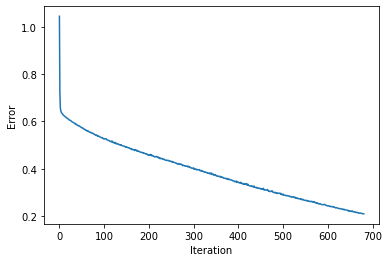

In [16]:
plt.plot(history.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Error")